### 1. Bibliothèques et imports

In [130]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
!pip install joypy
import joypy
from sklearn.preprocessing import LabelEncoder
from sklearn import decomposition, preprocessing
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.decomposition import PCA
###      https://archive.ics.uci.edu/ml/datasets/Diabetes+130-US+hospitals+for+years+1999-2008

### 2. Chargement des données

In [180]:
#df = pd.read_csv("/Users/HUGO/Desktop/dataset_diabetes/diabetic_data.csv")
data = pd.read_csv("/content/diabetic_data.csv")
#df_ids = pd.read_csv("/Users/HUGO/Desktop/dataset_diabetes/IDs_mapping.csv")
#df_ids = pd.read_csv("‪/content/IDs_mapping.csv")
data

encounter_id  patient_nbr  ... diabetesMed readmitted
0            2278392      8222157  ...          No         NO
1             149190     55629189  ...         Yes        >30
2              64410     86047875  ...         Yes         NO
3             500364     82442376  ...         Yes         NO
4              16680     42519267  ...         Yes         NO
...              ...          ...  ...         ...        ...
101761     443847548    100162476  ...         Yes        >30
101762     443847782     74694222  ...         Yes         NO
101763     443854148     41088789  ...         Yes         NO
101764     443857166     31693671  ...         Yes         NO
101765     443867222    175429310  ...          No         NO

[101766 rows x 50 columns]

In [132]:
#df_ids
#data_table.enable_dataframe_formatter()

#df_ids

In [133]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

### En savoir plus sur les données

![image.png](attachment:image.png)

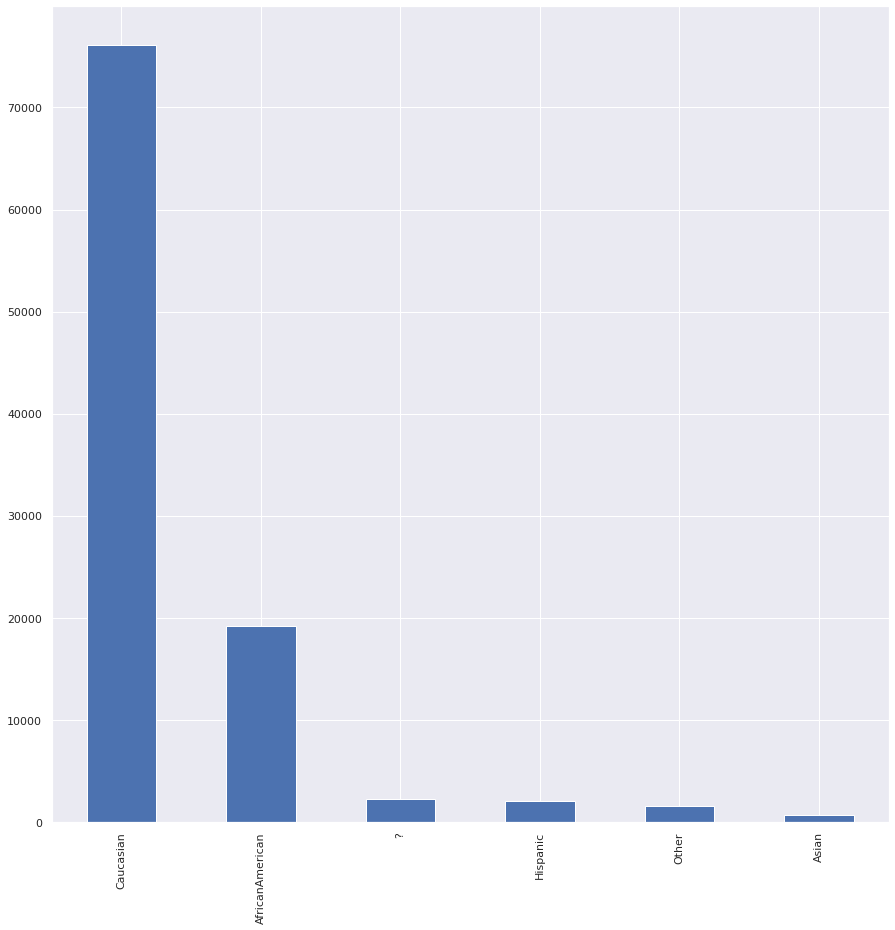

In [134]:
df = data
pd.value_counts(df['race']).plot.bar()
#Mdr ils font des stats sur les races, quelque chose qu'on peut pas faire en France ahah

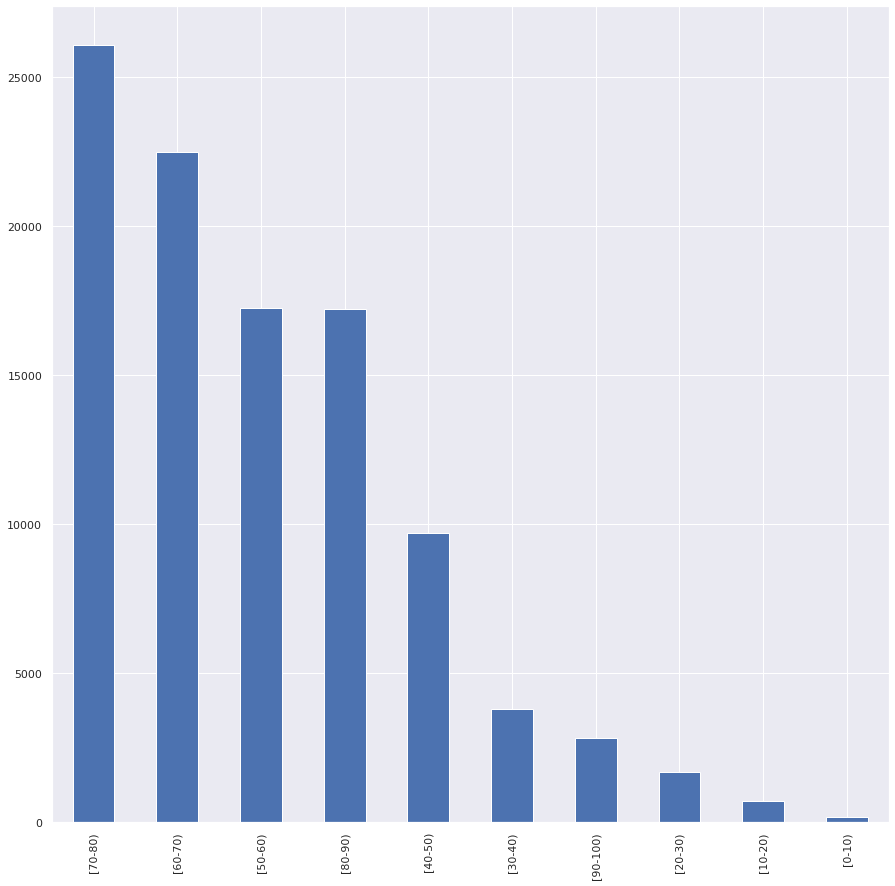

In [135]:
df = data
pd.value_counts(df['age']).plot.bar()

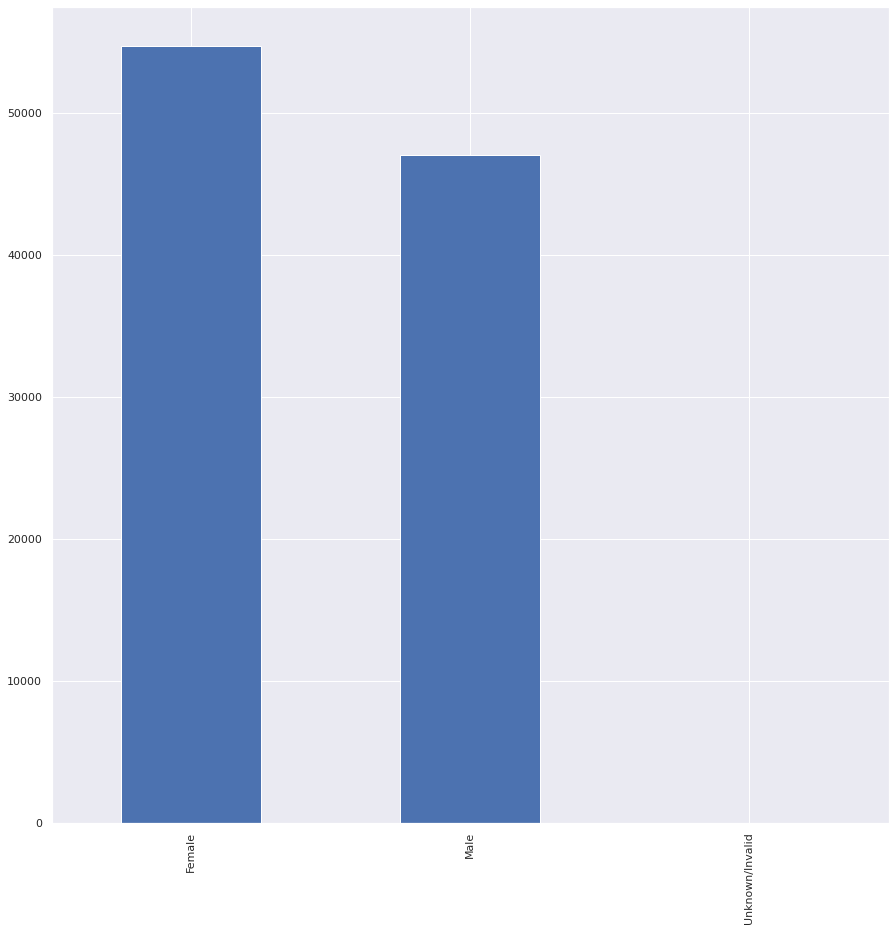

In [136]:
df = data
pd.value_counts(df['gender']).plot.bar()

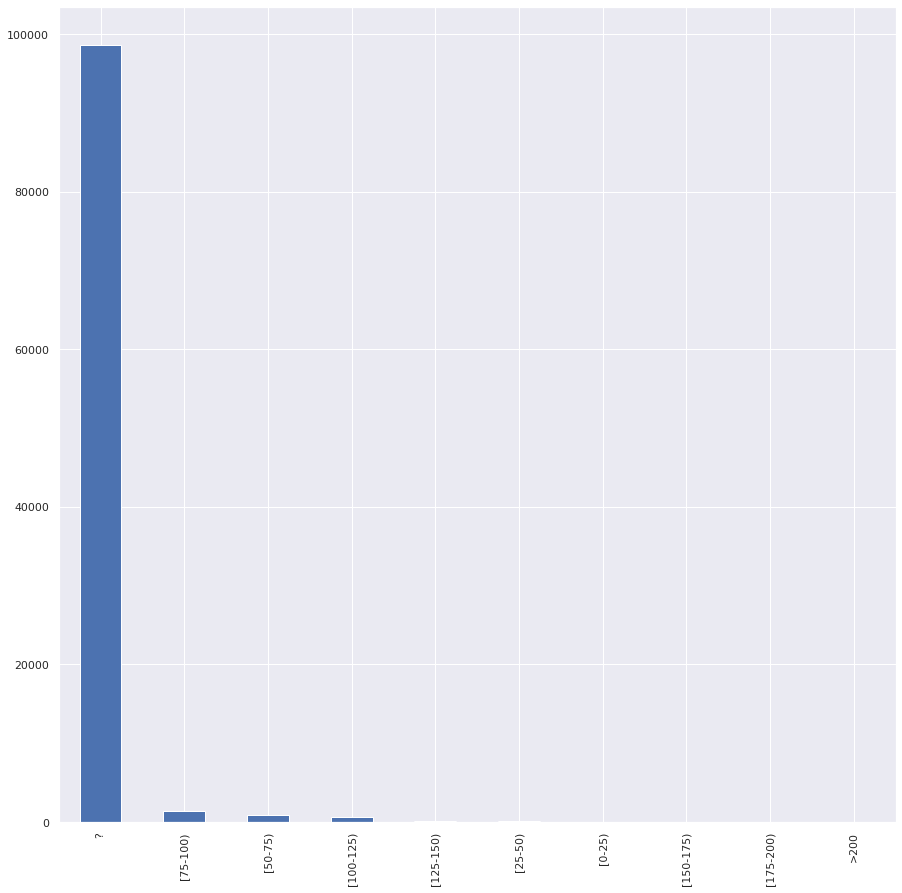

In [137]:

df = data
pd.value_counts(df['weight']).plot.bar()

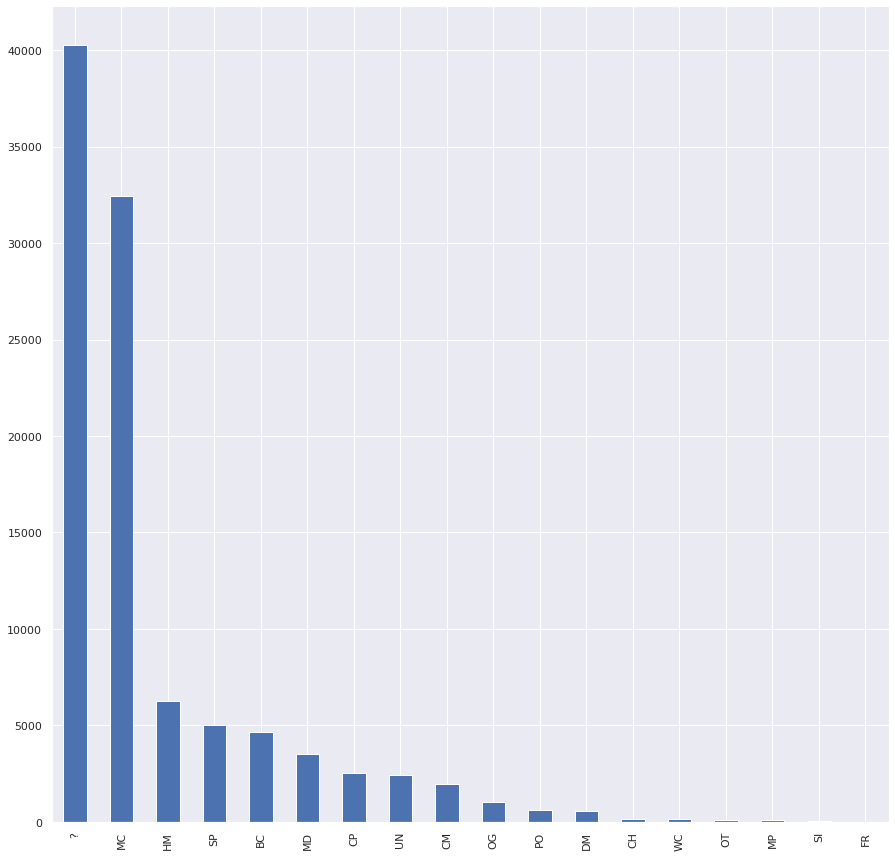

In [138]:

df = data
pd.value_counts(df['payer_code']).plot.bar()

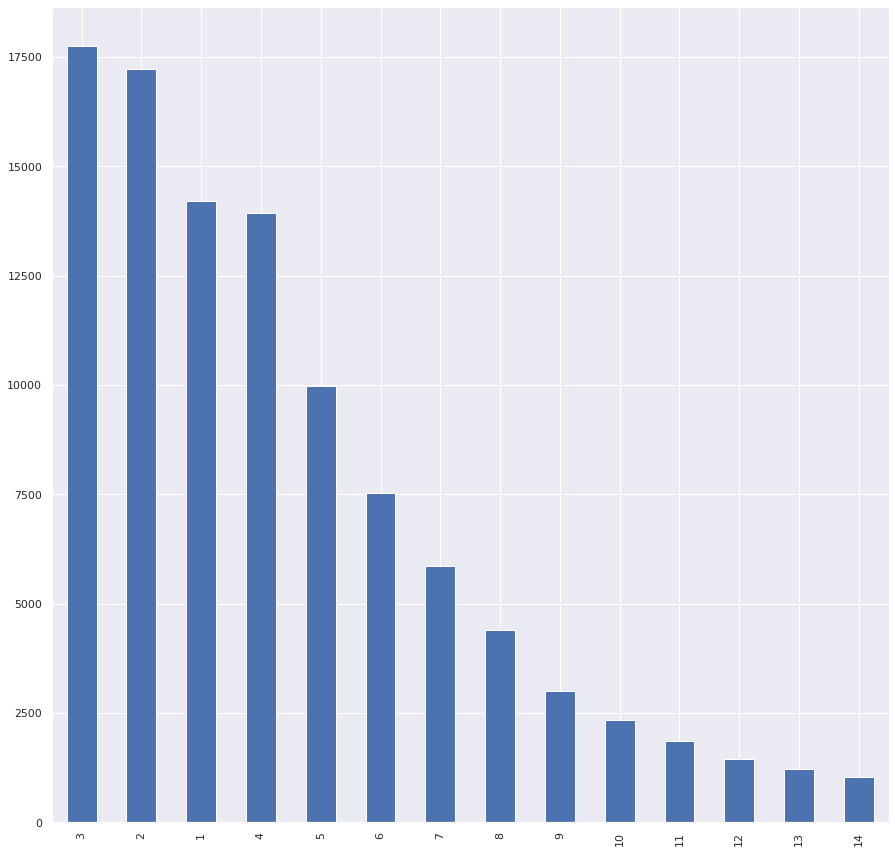

In [139]:
df = data
pd.value_counts(df['time_in_hospital']).plot.bar()

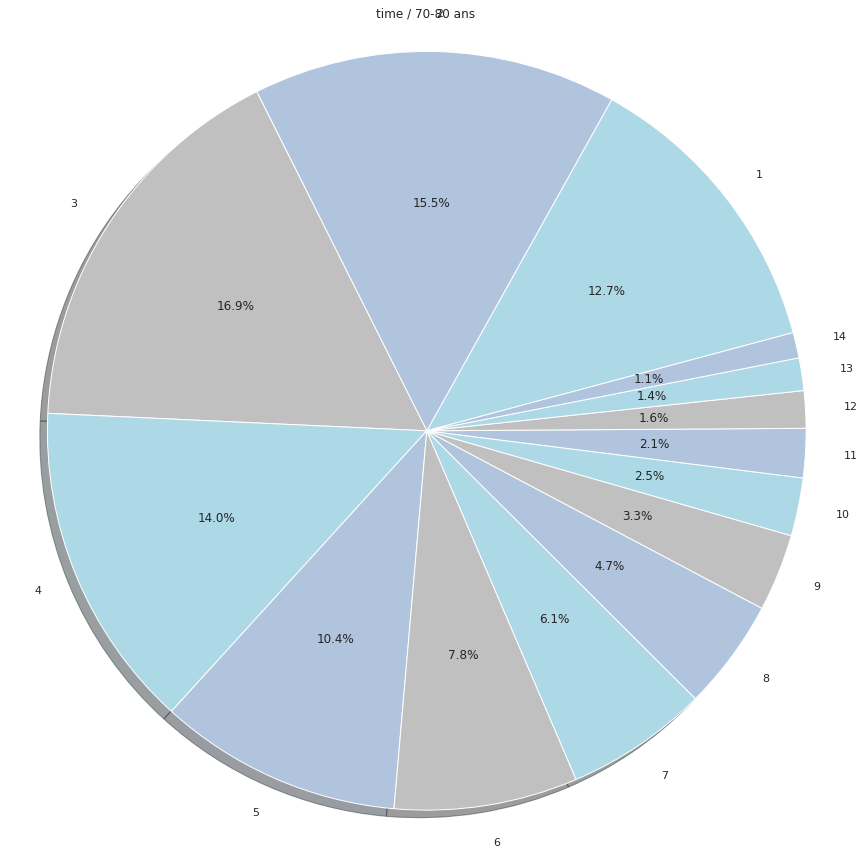

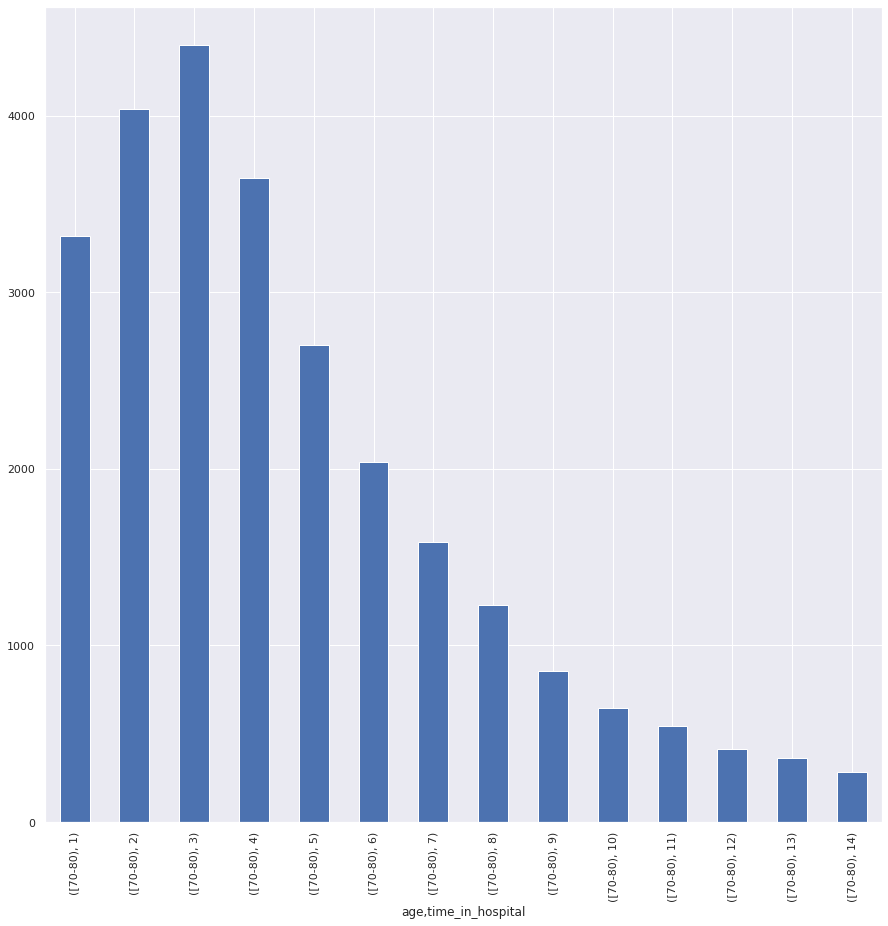

In [140]:
df = data
tempo = df.loc[df['age'] == "[70-80)"]
tempo.groupby(['age','time_in_hospital']).size()

my_colors = ['lightblue','lightsteelblue','silver']

plt.pie(tempo.groupby(['age','time_in_hospital']).size(), labels = range(1,15),autopct='%1.1f%%',startangle=15, shadow = True, colors=my_colors)
plt.title('time / 70-80 ans')
plt.axis('equal')
plt.show()

tempo.groupby(['age','time_in_hospital']).size().plot.bar()
#Heures/jour ? temps ? passer en hopital pour les 70-80 ans

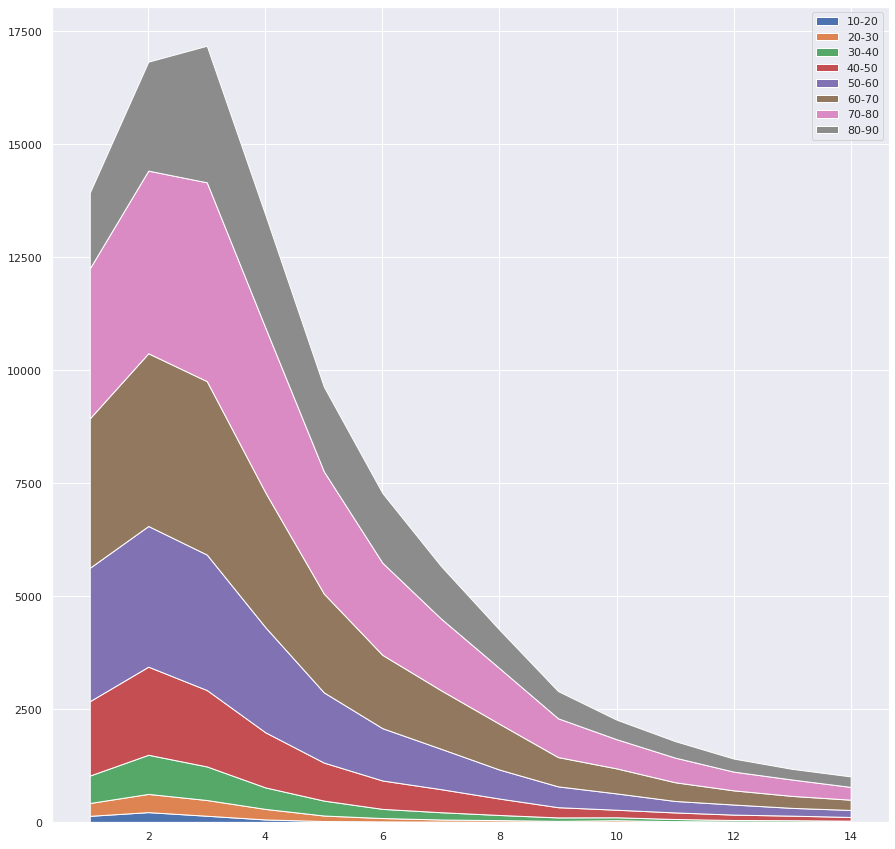

In [141]:
df = data
x = range(1,15)
tempo = df.loc[df['age'] == "[10-20)"]
y20 = tempo.groupby(['age','time_in_hospital']).size()
tempo = df.loc[df['age'] == "[20-30)"]
y30 = tempo.groupby(['age','time_in_hospital']).size()
tempo = df.loc[df['age'] == "[30-40)"]
y40 = tempo.groupby(['age','time_in_hospital']).size()
tempo = df.loc[df['age'] == "[40-50)"]
y50 = tempo.groupby(['age','time_in_hospital']).size()
tempo = df.loc[df['age'] == "[50-60)"]
y60 = tempo.groupby(['age','time_in_hospital']).size()
tempo = df.loc[df['age'] == "[60-70)"]
y70 = tempo.groupby(['age','time_in_hospital']).size()
tempo = df.loc[df['age'] == "[70-80)"]
y80 = tempo.groupby(['age','time_in_hospital']).size()
tempo = df.loc[df['age'] == "[80-90)"]
y90 = tempo.groupby(['age','time_in_hospital']).size()

plt.stackplot(x, y20, y30, y40, y50, y60,y70, y80, y90,labels=['10-20','20-30','30-40','40-50','50-60','60-70','70-80','80-90'])
plt.legend(loc='upper right')
#Stackplot

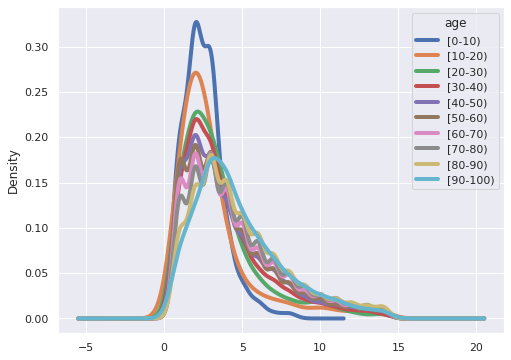

In [142]:
df = data
data_wide = df.pivot(columns = 'age',
                     values =  'time_in_hospital')

data_wide.plot.kde(figsize = (8, 6),
                   linewidth = 4)
#Density plot

<Figure size 1120x800 with 0 Axes>

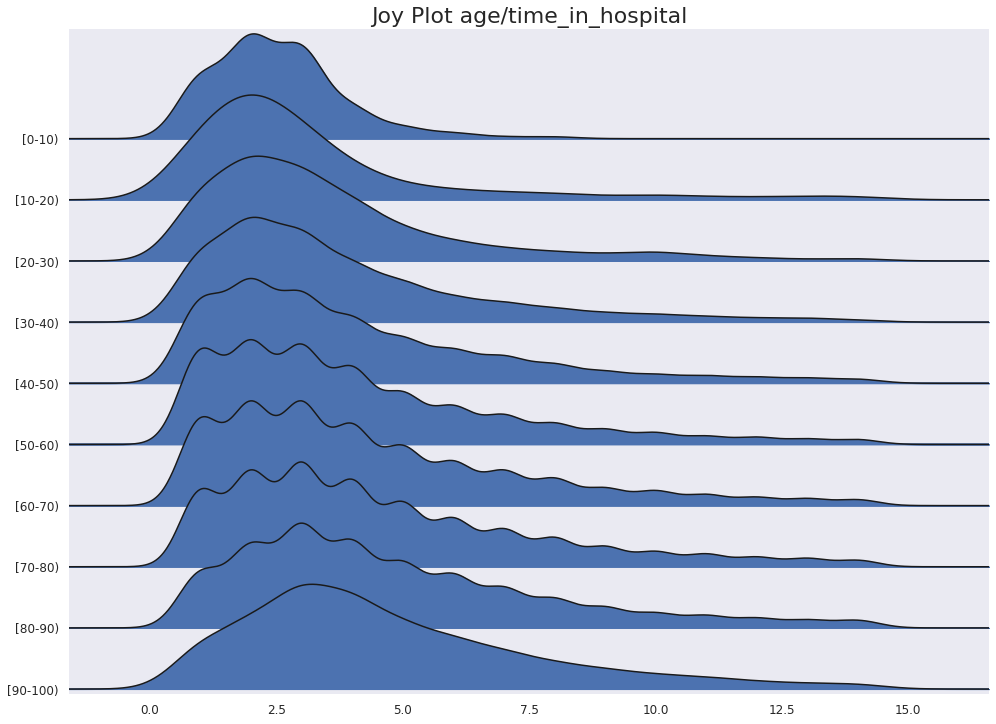

In [143]:
df = data
plt.figure(figsize=(14,10), dpi= 80)
fig, axes = joypy.joyplot(df, column=['time_in_hospital', 'age'], by="age", ylim='own', figsize=(14,10))

# Decoration
plt.title('Joy Plot age/time_in_hospital', fontsize=22)
plt.show()
#Waves Poggers

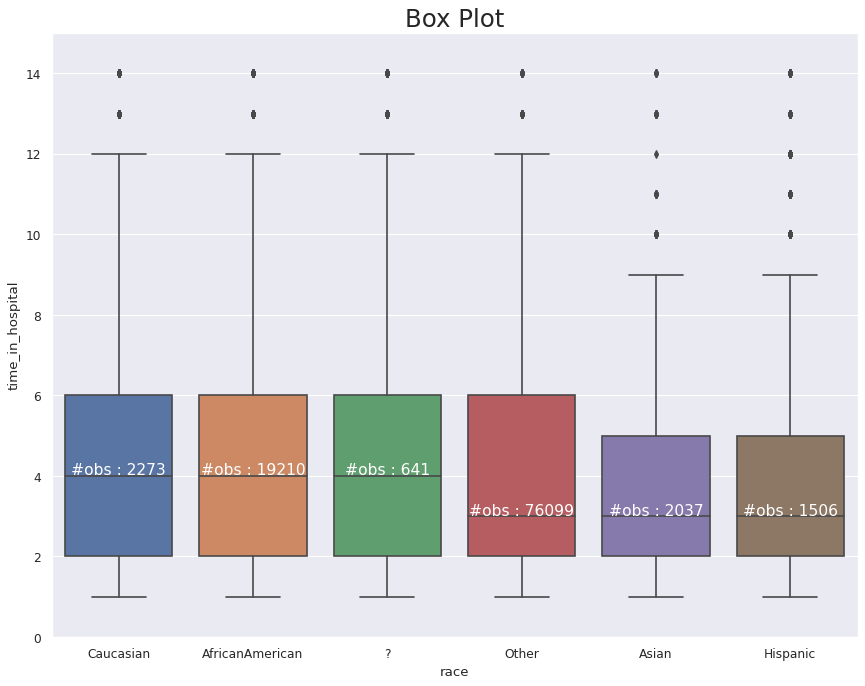

In [144]:
df = data
plt.figure(figsize=(13,10), dpi= 80)
sns.boxplot(x='race', y='time_in_hospital', data=df, notch=False)

# Add N Obs inside boxplot (optional)
def add_n_obs(df,group_col,y):
    medians_dict = {grp[0]:grp[1][y].median() for grp in df.groupby(group_col)}
    xticklabels = [x.get_text() for x in plt.gca().get_xticklabels()]
    n_obs = df.groupby(group_col)[y].size().values
    for (x, xticklabel), n_ob in zip(enumerate(xticklabels), n_obs):
        plt.text(x, medians_dict[xticklabel]*1.01, "#obs : "+str(n_ob), horizontalalignment='center', fontdict={'size':14}, color='white')

add_n_obs(df,group_col='race',y='time_in_hospital')    

# Decoration
plt.title('Box Plot', fontsize=22)
plt.ylim(0, 15)
plt.show()

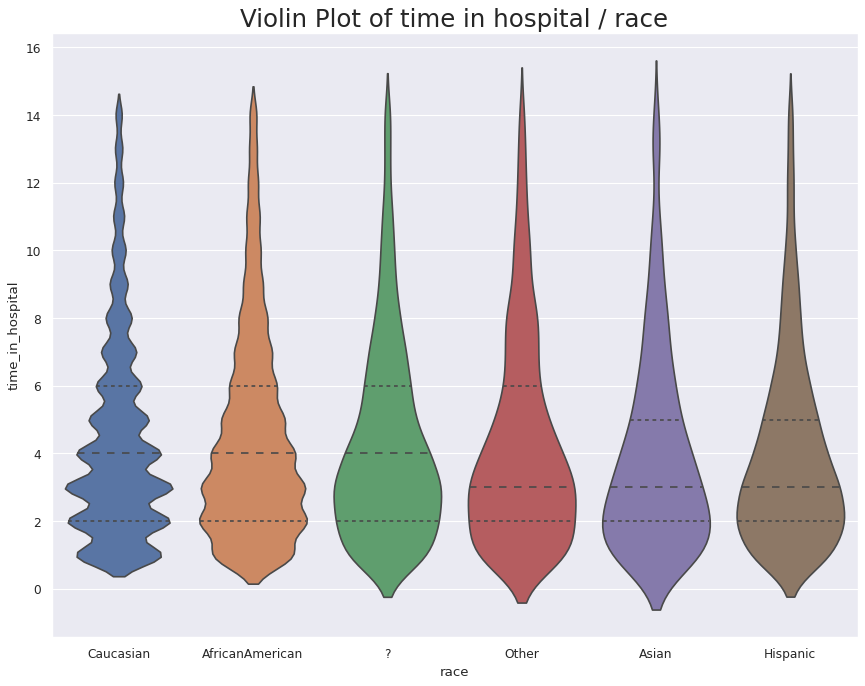

In [145]:
df = data
plt.figure(figsize=(13,10), dpi= 80)
sns.violinplot(x='race', y='time_in_hospital', data=df, scale='width', inner='quartile')

# Decoration
plt.title('Violin Plot of time in hospital / race', fontsize=22)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



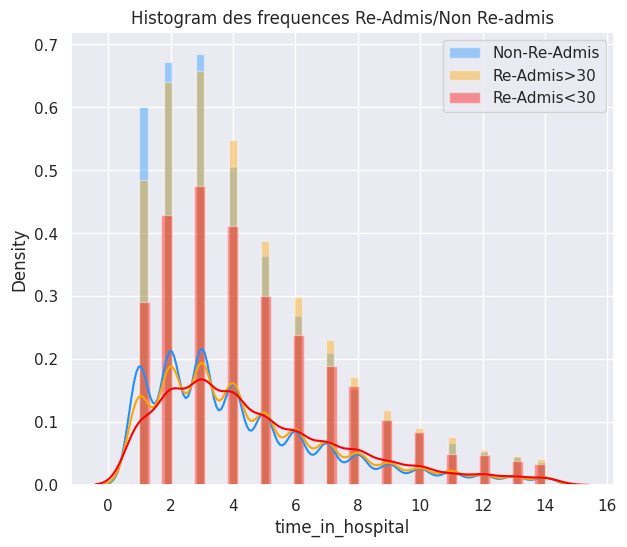

In [146]:
df = data
plt.subplots(figsize=(7,6), dpi=100)
sns.distplot( df.loc[df.readmitted=='NO', "time_in_hospital"] , color="dodgerblue", label="Non-Re-Admis")
sns.distplot( df.loc[df.readmitted=='>30', "time_in_hospital"] , color="orange", label="Re-Admis>30")
sns.distplot( df.loc[df.readmitted=='<30', "time_in_hospital"] , color="red", label="Re-Admis<30")

plt.title('Histogram des frequences Re-Admis/Non Re-admis')
plt.legend();

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/l

1         20
2         30
3         40
4         50
5         60
          ..
101761    80
101762    90
101763    80
101764    90
101765    80
Name: age, Length: 101605, dtype: object

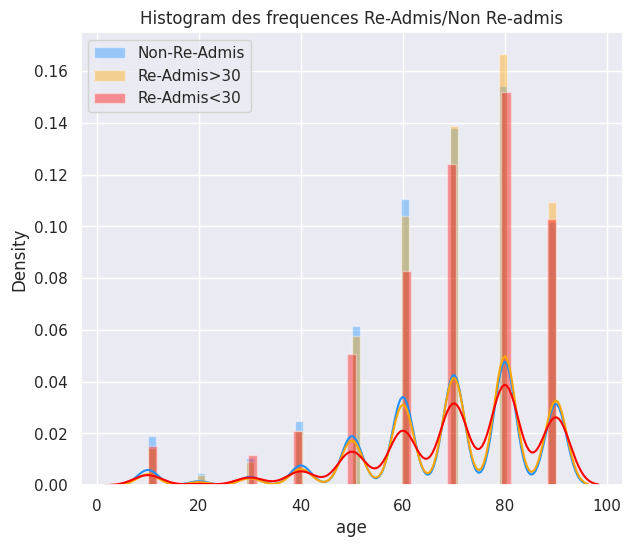

In [147]:
df = data
tempo = df
tempo = tempo[tempo['age'] != '[0-10)']
tempo['age'] = tempo['age'].str[4:6]
plt.subplots(figsize=(7,6), dpi=100)
sns.distplot( tempo.loc[df.readmitted=='NO', "age"] , color="dodgerblue", label="Non-Re-Admis")
sns.distplot( tempo.loc[df.readmitted=='>30', "age"] , color="orange", label="Re-Admis>30")
sns.distplot( tempo.loc[df.readmitted=='<30', "age"] , color="red", label="Re-Admis<30")

plt.title('Histogram des frequences Re-Admis/Non Re-admis')
plt.legend();
tempo['age']

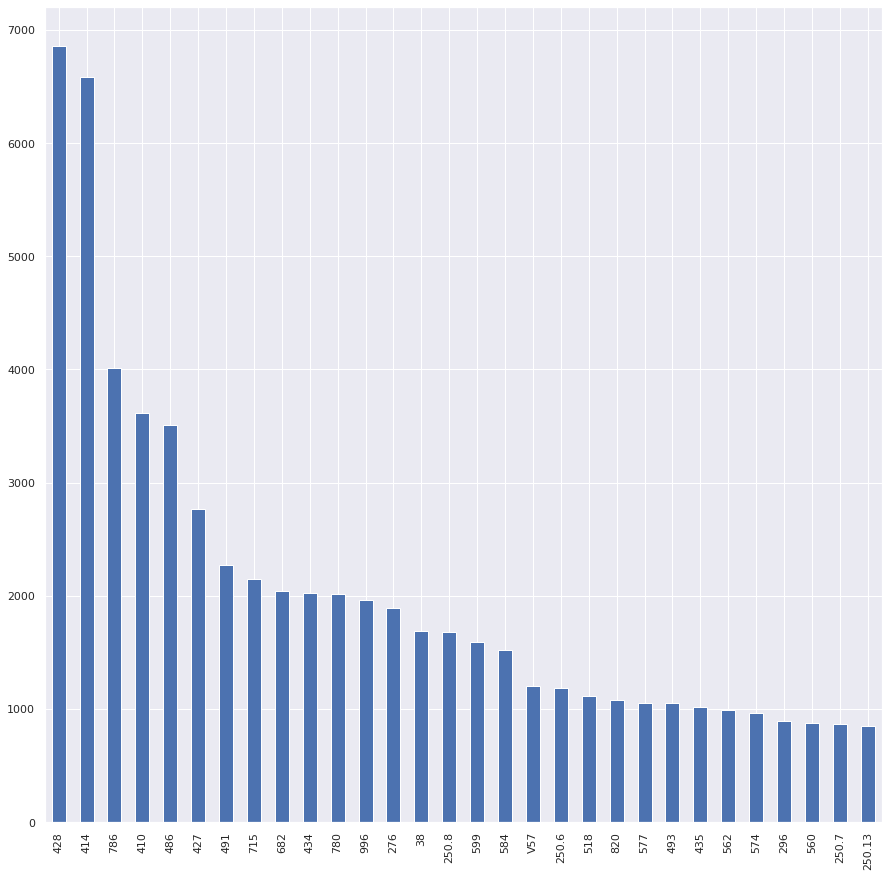

In [148]:
df = data
pd.value_counts(df['diag_1']).head(30).plot.bar()

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning:

96.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning:

93.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning:

95.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning:

88.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.



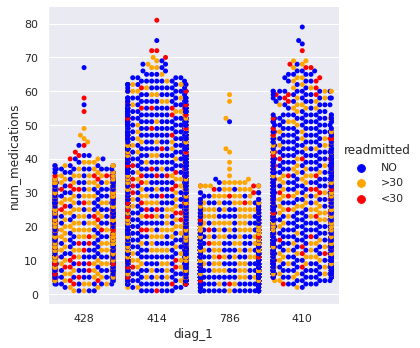

In [149]:
df = data
sns.set(rc={'figure.figsize':(20,20)})
sns.catplot(x="diag_1", y= 'num_medications',hue = 'readmitted', kind='swarm', data=df,order=df.diag_1.value_counts().iloc[:4].index ,
                  palette=sns.color_palette(['blue', 'orange','red']))
# ca prends bcp de temps mais ca marchais

<function matplotlib.pyplot.show>

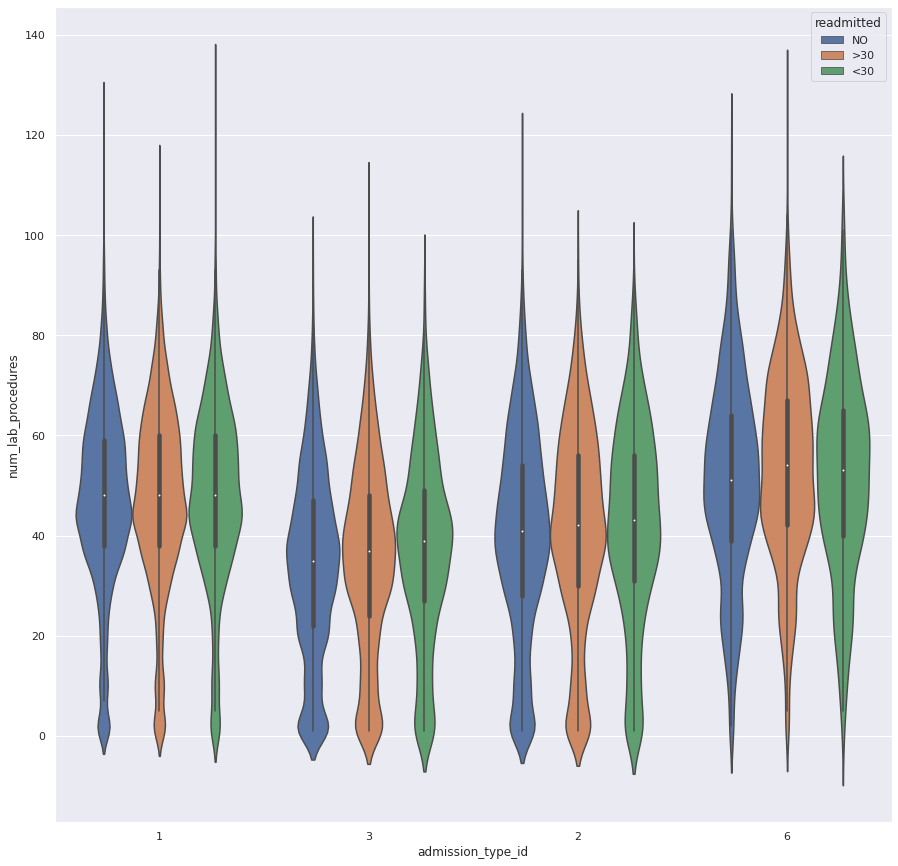

In [150]:
df = data
#sns.catplot(x='admission_type_id' , y= 'num_lab_procedures',hue = 'readmitted', kind='swarm', data=df,order=df.admission_type_id.value_counts().iloc[:4].index,palette=sns.color_palette(['blue', 'orange','red']))
#Jsp si ca marche ?
colors = ["#3D59AB", "#C76114","#CD2626"]
sns.set_palette(sns.color_palette(colors))
sns.set(rc={'figure.figsize':(15,15)})
ax = sns.violinplot(x="admission_type_id", y="num_lab_procedures", hue="readmitted",
                    data=df, order=df.admission_type_id.value_counts().iloc[:4].index)

# Decoration

plt.show

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



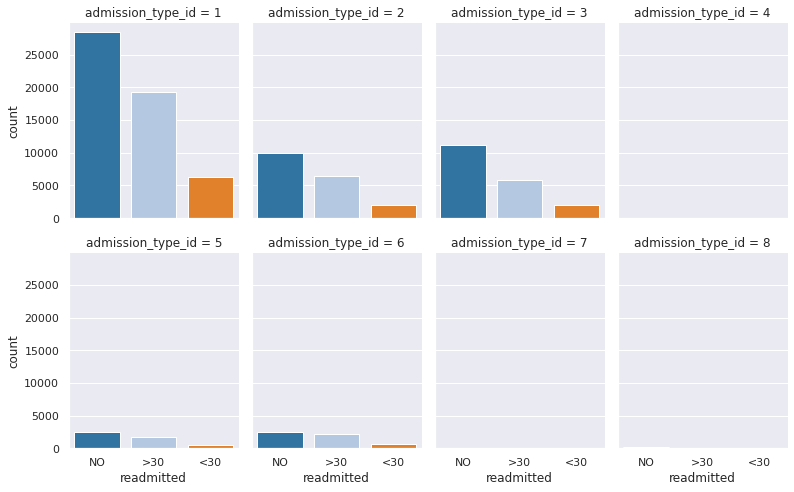

In [151]:
df = data
g = sns.catplot("readmitted", col="admission_type_id", col_wrap=4,
                data=df[df.admission_type_id.notnull()],
                kind="count", height=3.5, aspect=.8, 
                palette='tab20')

fig.suptitle('sf')
plt.show()

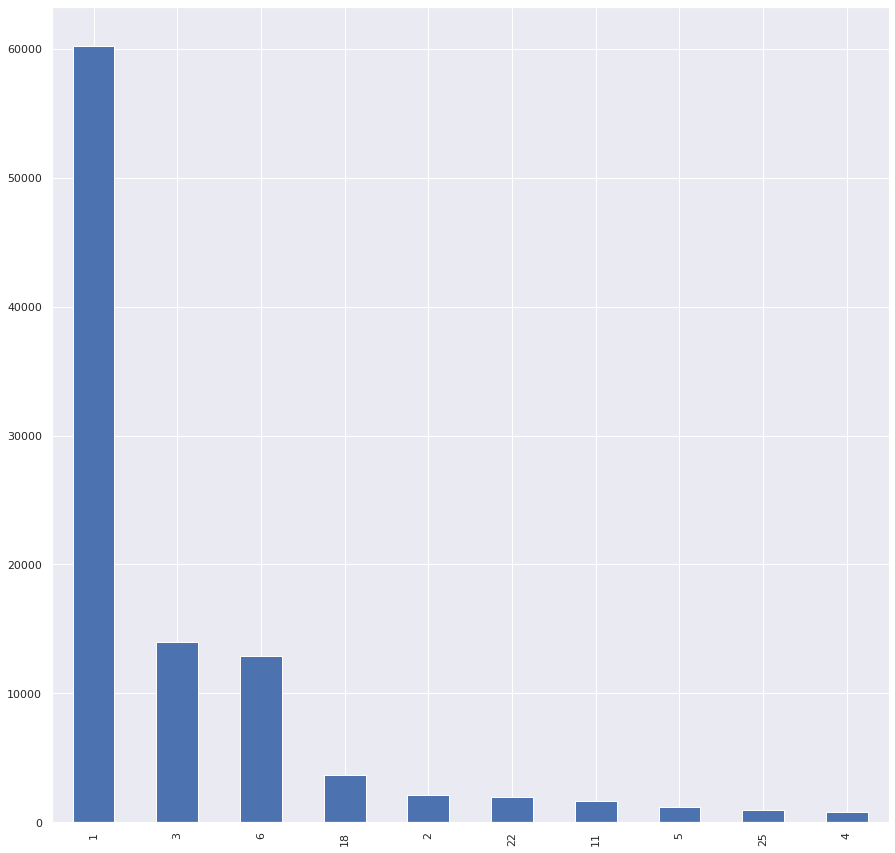

In [152]:
df = data
pd.value_counts(df['discharge_disposition_id']).head(10).plot.bar()

# ACP :

In [181]:
from collections import defaultdict
df = data
# choix du nombre de composantes à calculer
n_comp = 50
d = defaultdict(LabelEncoder)
fit = df.apply(lambda x: d[x.name].fit_transform(x))
fit

encounter_id  patient_nbr  race  ...  change  diabetesMed  readmitted
0                134        10362     3  ...       1            0           2
1                 17        38209     3  ...       0            1           1
2                 11        52511     1  ...       1            1           2
3                 46        49787     3  ...       0            1           2
4                  2        32262     3  ...       0            1           2
...              ...          ...   ...  ...     ...          ...         ...
101761        101761        61971     1  ...       0            1           1
101762        101762        47079     1  ...       1            1           2
101763        101763        30439     3  ...       0            1           2
101764        101764        25479     3  ...       0            1           2
101765        101765        70929     3  ...       1            0           2

[101766 rows x 50 columns]

In [182]:
from collections import defaultdict
from sklearn.preprocessing import StandardScaler
df = data
# choix du nombre de composantes à calculer
n_comp = 50
d = defaultdict(LabelEncoder)
fit = df.apply(lambda x: d[x.name].fit_transform(x))
df = fit

# choix du nombre de composantes à calculer
n_comp = 50

# préparation des données pour l'ACP
X = df.values
features = df.columns

scaler = StandardScaler()

scaled=df.copy()
scaled=pd.DataFrame(scaler.fit_transform(scaled), columns=scaled.columns)
scaled.head()

encounter_id  patient_nbr      race  ...    change  diabetesMed  readmitted
0     -1.727472    -1.222446  0.427557  ...  0.926591    -1.829868     0.83688
1     -1.731455     0.132405  0.427557  ... -1.079225     0.546488    -0.62497
2     -1.731659     0.828245 -1.703706  ...  0.926591     0.546488     0.83688
3     -1.730468     0.695713  0.427557  ... -1.079225     0.546488     0.83688
4     -1.731966    -0.156937  0.427557  ... -1.079225     0.546488     0.83688

[5 rows x 50 columns]

In [183]:
pca = PCA(n_components=6, svd_solver = 'auto')
Principal_components=pca.fit_transform(scaled)
pca_df = pd.DataFrame(data = Principal_components, columns = ['PC 1', 'PC 2', 'PC 3', 'PC 4', 'PC 5', 'PC 6'])
pca_df

PC 1      PC 2      PC 3      PC 4      PC 5      PC 6
0      -5.290784  1.301181  0.395939  0.597021 -2.076091 -1.743185
1      -0.335823  1.085444  0.587536 -1.939815 -0.677004  1.657912
2      -1.792991  0.332555  0.773396 -0.350540 -1.079309  0.059158
3      -0.722192  0.645067  1.164218 -0.580266 -0.036120  0.960827
4      -1.638360  0.732744  2.034771 -1.354434  0.520515  1.904147
...          ...       ...       ...       ...       ...       ...
101761  1.748111 -1.017548  1.156782 -0.470065  0.615163  2.100928
101762  1.075153 -1.217380 -0.670208  0.518078 -0.318359  0.909522
101763  1.763691 -1.785068  0.732411  0.173141  1.657045  1.041793
101764  2.487733  1.241289  0.347717  1.211282 -0.237098 -1.480869
101765 -0.382511 -2.662623 -1.128484  1.671178  0.412170  0.170580

[101766 rows x 6 columns]

In [184]:
for_visual = pd.concat([pca_df, df['readmitted']], axis = 1)
for_visual

PC 1      PC 2      PC 3      PC 4      PC 5      PC 6  readmitted
0      -5.290784  1.301181  0.395939  0.597021 -2.076091 -1.743185           2
1      -0.335823  1.085444  0.587536 -1.939815 -0.677004  1.657912           1
2      -1.792991  0.332555  0.773396 -0.350540 -1.079309  0.059158           2
3      -0.722192  0.645067  1.164218 -0.580266 -0.036120  0.960827           2
4      -1.638360  0.732744  2.034771 -1.354434  0.520515  1.904147           2
...          ...       ...       ...       ...       ...       ...         ...
101761  1.748111 -1.017548  1.156782 -0.470065  0.615163  2.100928           1
101762  1.075153 -1.217380 -0.670208  0.518078 -0.318359  0.909522           2
101763  1.763691 -1.785068  0.732411  0.173141  1.657045  1.041793           2
101764  2.487733  1.241289  0.347717  1.211282 -0.237098 -1.480869           2
101765 -0.382511 -2.662623 -1.128484  1.671178  0.412170  0.170580           2

[101766 rows x 7 columns]

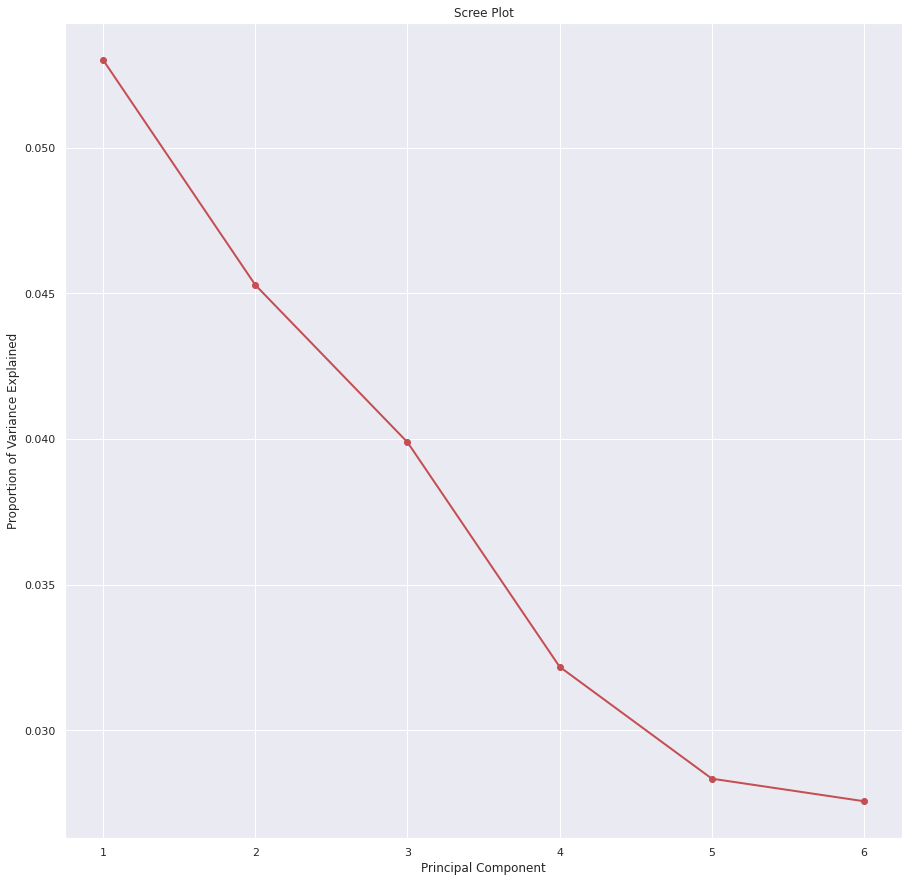

In [185]:
PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'ro-', linewidth=2)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Proportion of Variance Explained')
plt.show()

In [186]:
print("Proportion of Variance Explained : ", pca.explained_variance_ratio_)  
    
out_sum = np.cumsum(pca.explained_variance_ratio_)  
print("Cumulative Prop. Variance Explained: ", out_sum)

Proportion of Variance Explained :  [0.05300434 0.04528294 0.03988528 0.03217785 0.0283399  0.02756546]
Cumulative Prop. Variance Explained:  [0.05300434 0.09828728 0.13817256 0.17035041 0.19869031 0.22625576]


In [187]:
pca.explained_variance_

array([2.54423343, 2.17360235, 1.91451218, 1.54455191, 1.36032857,
       1.32315498])

In [188]:
loadings = pd.DataFrame(pca.components_.T, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6'], index=df.columns)
loadings

PC1       PC2  ...       PC5       PC6
encounter_id              0.368531 -0.381058  ... -0.085863  0.084044
patient_nbr               0.309416 -0.329334  ...  0.003064 -0.053614
race                      0.095133 -0.070337  ...  0.206917 -0.280730
gender                    0.000963  0.014635  ... -0.047835  0.113540
age                       0.118435 -0.061613  ...  0.412796 -0.135898
weight                    0.040681 -0.033976  ...  0.041789 -0.096998
admission_type_id        -0.092079  0.171378  ... -0.031765 -0.451006
discharge_disposition_id -0.029996  0.190163  ...  0.195882 -0.169782
admission_source_id      -0.014807 -0.025702  ...  0.363324 -0.010595
time_in_hospital          0.225624  0.305575  ... -0.030029  0.090661
payer_code                0.268802 -0.302016  ... -0.087068  0.081309
medical_specialty        -0.131114  0.191014  ... -0.328280 -0.226879
num_lab_procedures        0.169851  0.171439  ...  0.007740  0.376404
num_procedures            0.088415  0.238163  ... -0.235134 -0.003761
num_medications           0.328170  0.333421  ... -0.118635 -0.003531
number_outpatient         0.129220 -0.111284  ... -0.056155 -0.181372
number_emergency          0.111470 -0.099216  ... -0.296640 -0.254403
number_inpatient          0.108575 -0.044680  ... -0.264490 -0.251590
diag_1                   -0.003350 -0.042151  ...  0.170090 -0.285104
diag_2                    0.092180 -0.035163  ... -0.054186 -0.118312
diag_3                    0.021512 -0.010917  ... -0.100823 -0.067760
number_diagnoses          0.329232 -0.086142  ...  0.137491 -0.021383
max_glu_serum            -0.006521 -0.069866  ... -0.129753  0.028470
A1Cresult                -0.034922 -0.098144  ...  0.059610 -0.178947
metformin                 0.119822  0.151283  ...  0.122700 -0.012315
repaglinide               0.077693  0.006517  ...  0.045207 -0.028248
nateglinide               0.041217  0.011945  ... -0.021348  0.005520
chlorpropamide           -0.010329  0.027260  ...  0.013826  0.004768
glimepiride               0.085892  0.042214  ... -0.027589 -0.110582
acetohexamide             0.003756  0.008255  ...  0.069435  0.040623
glipizide                 0.084199  0.091319  ...  0.142270 -0.026345
glyburide                 0.037200  0.144868  ...  0.181517  0.034426
tolbutamide              -0.006952  0.007355  ...  0.144906  0.033560
pioglitazone              0.121336  0.057728  ...  0.024046 -0.124875
rosiglitazone             0.067456  0.125140  ...  0.148406 -0.094927
acarbose                  0.032109  0.025205  ...  0.084257 -0.119924
miglitol                  0.007567  0.009119  ...  0.003009  0.061857
troglitazone              0.000783  0.007467  ...  0.013207 -0.002572
tolazamide               -0.016630  0.024714  ...  0.015386 -0.037076
examide                  -0.000000  0.000000  ...  0.000000  0.000000
citoglipton              -0.000000  0.000000  ...  0.000000  0.000000
insulin                   0.137443  0.084271  ... -0.175125  0.099446
glyburide-metformin       0.043292 -0.027219  ... -0.049593 -0.029328
glipizide-metformin       0.010472 -0.010404  ... -0.001286  0.038835
glimepiride-pioglitazone  0.000194  0.002772  ...  0.064331  0.083515
metformin-rosiglitazone   0.004052 -0.006191  ... -0.016793  0.062845
metformin-pioglitazone    0.000471  0.012622  ... -0.013351 -0.015954
change                   -0.336104 -0.244094  ... -0.067576  0.020182
diabetesMed               0.292155  0.243341  ...  0.034195 -0.003622
readmitted               -0.109096  0.002516  ...  0.069154  0.223860

[50 rows x 6 columns]

encounter_id  patient_nbr  race  ...      PC18      PC19      PC20
0           134        10362     3  ...  0.093047  0.245084 -0.802672
1            17        38209     3  ...  0.944390  0.527602 -0.668710
2            11        52511     1  ...  1.374857  0.881385  1.265786
3            46        49787     3  ...  0.689057  0.477268 -0.436421
4             2        32262     3  ...  0.531815  0.247763 -0.690688

[5 rows x 70 columns]

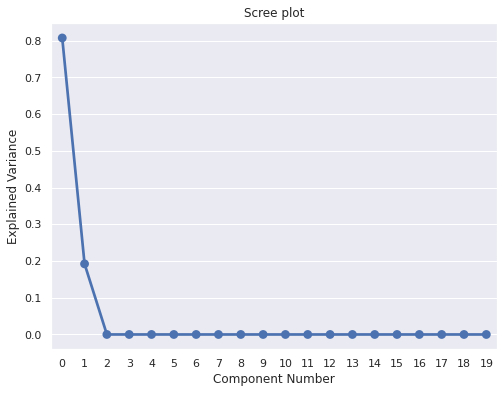

In [189]:
from sklearn.decomposition import PCA
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
 
n_components = 20
cols = df.columns
# Do the PCA.
pca = PCA(n_components=n_components)
reduced = pca.fit_transform(df[cols])
 
# Append the principle components for each entry to the dataframe
for i in range(0, n_components):
    df['PC' + str(i + 1)] = reduced[:, i]
 
display(df.head())
 
# Do a scree plot
ind = np.arange(0, n_components)
(fig, ax) = plt.subplots(figsize=(8, 6))
sns.pointplot(x=ind, y=pca.explained_variance_ratio_)
ax.set_title('Scree plot')
ax.set_xticks(ind)
ax.set_xticklabels(ind)
ax.set_xlabel('Component Number')
ax.set_ylabel('Explained Variance')
plt.show()
 


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.7/dist-packages/seaborn/regression.py:581: UserWarning:

The `size` parameter has been renamed to `height`; please update your code.



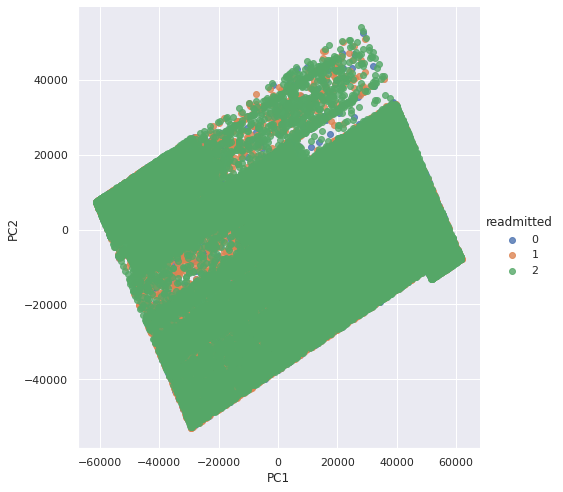

In [190]:
g = sns.lmplot(
    'PC1',
    'PC2',
    hue='readmitted',
    data=df,
    fit_reg=False,
    scatter=True,
    size=7,
    )
 
plt.show()
 


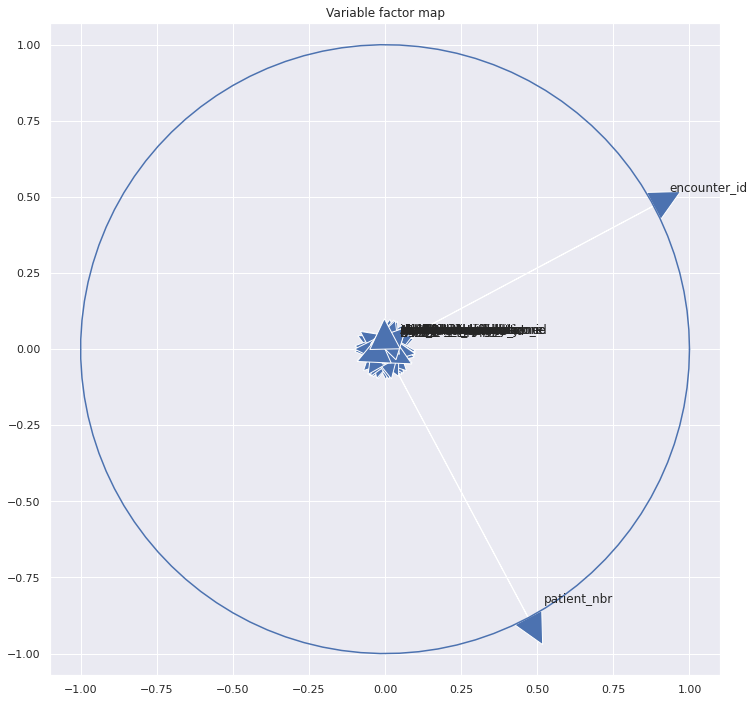

In [191]:
# Plot a variable factor map for the first two dimensions.
(fig, ax) = plt.subplots(figsize=(12, 12))
for i in range(0, len(pca.components_[0])):
    ax.arrow(0, 0,  # Start the arrow at the origin
             pca.components_[0, i], pca.components_[1, i],  # 0 and 1 correspond to dimension 1 and 2
             head_width=0.1,head_length=0.1)
    plt.text(pca.components_[0, i] + 0.05, pca.components_[1, i] + 0.05, df.columns.values[i])
 
an = np.linspace(0, 2 * np.pi, 100)  # Add a unit circle for scale
plt.plot(np.cos(an), np.sin(an))
plt.axis('equal')
ax.set_title('Variable factor map')
plt.show()

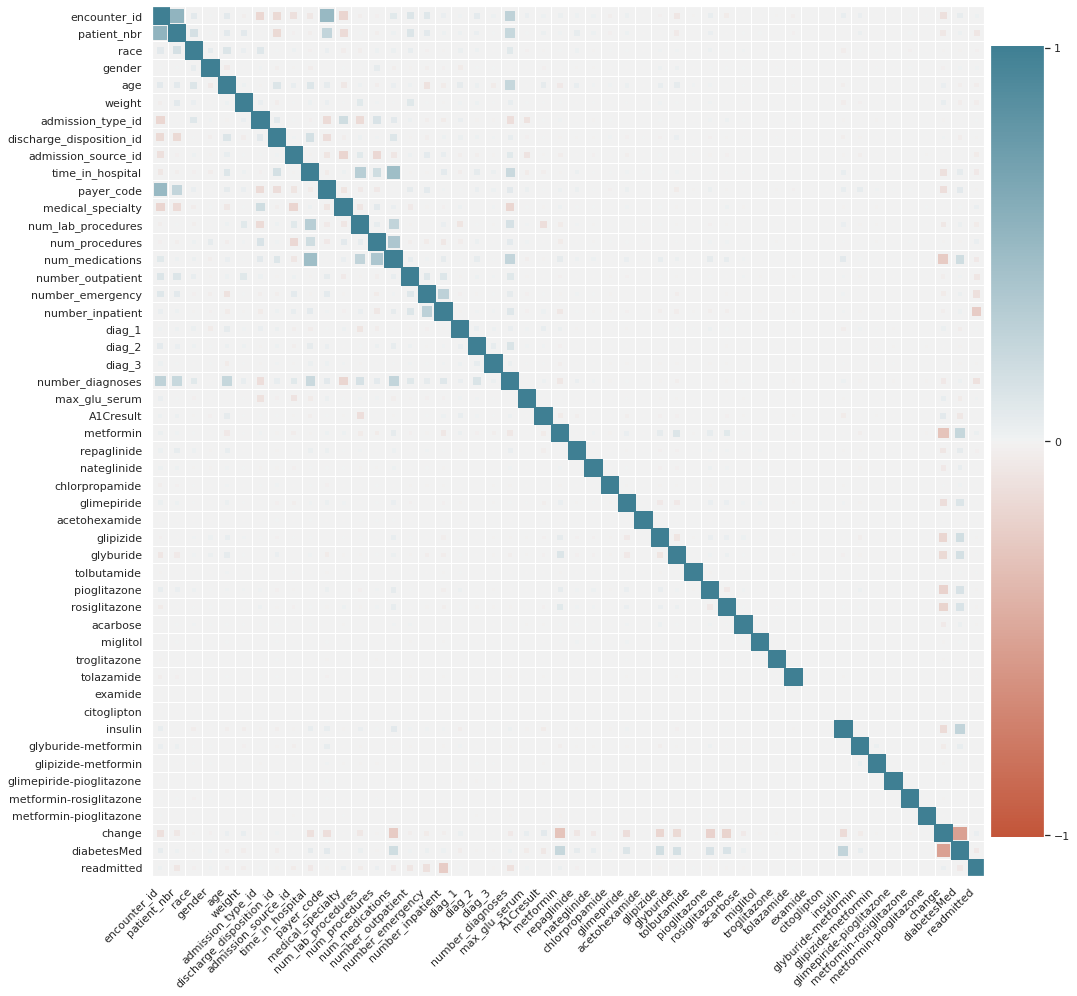

In [195]:

from heatmap import heatmap, corrplot
plt.figure(figsize=(16, 16))
corrplot(scaled.corr(), size_scale=300);
